In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
data.shape

(768, 9)

In [35]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

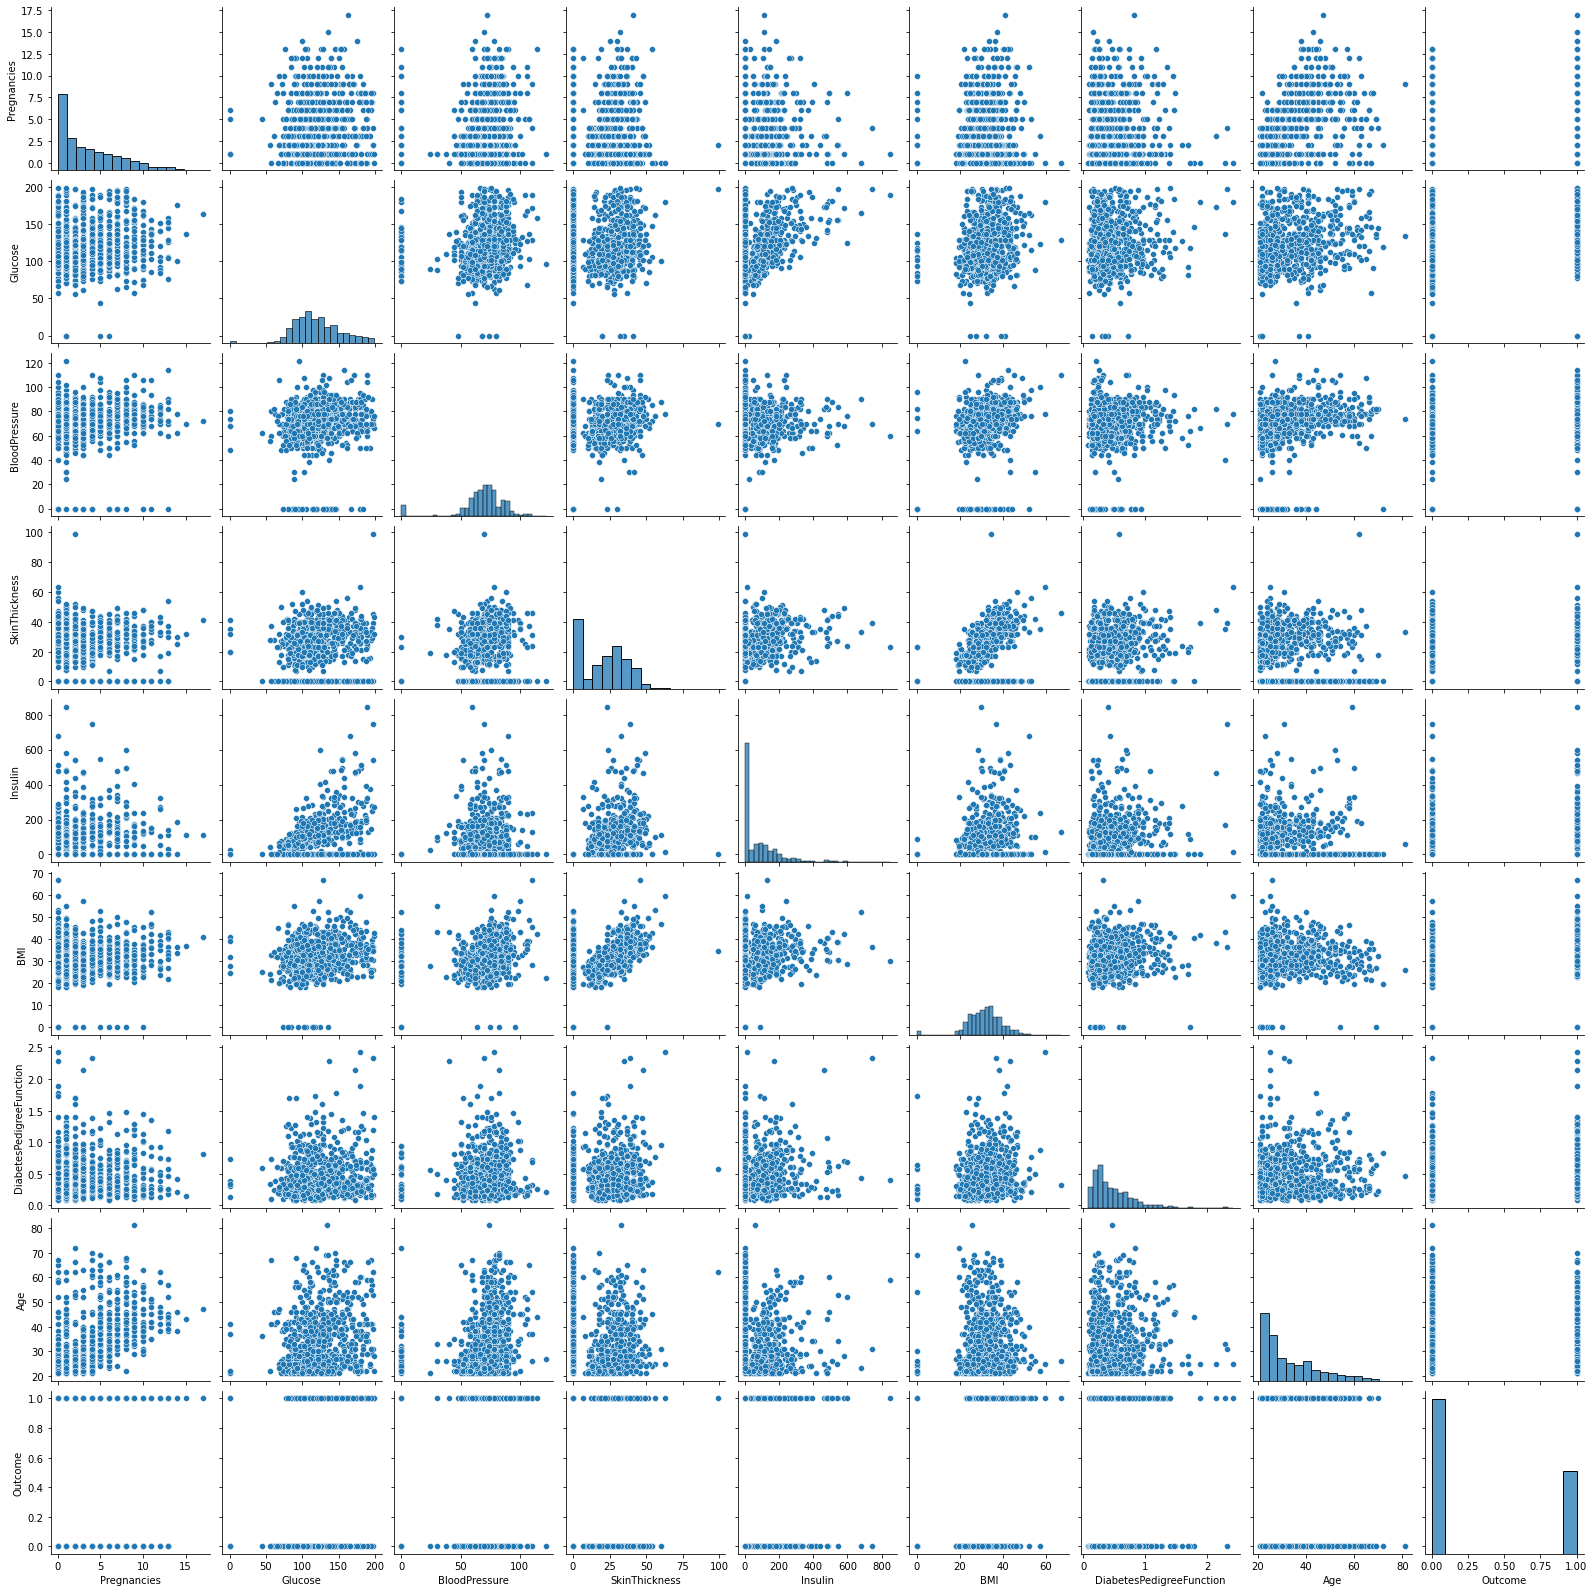

In [39]:
sns.pairplot(data)

<AxesSubplot:>

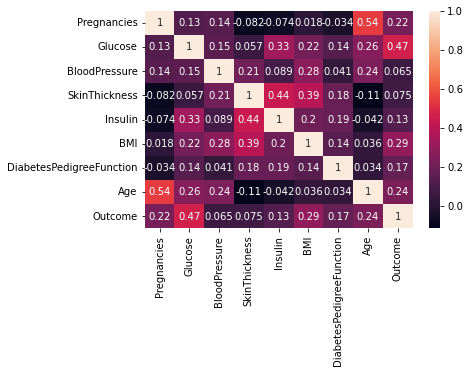

In [40]:
sns.heatmap(data.corr(),annot=True)

In [41]:
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [44]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [45]:
print("training accuracy:", model1.score(X_train,y_train))
print("testing accuracy:",model1.score(X_test,y_test))

training accuracy: 0.3036062936109921
testing accuracy: 0.29518488901247686


In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: -1.2292733243623424
MAE: 0.33179816361142783
MSE: 0.1618197958899925


In [47]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [48]:
print("training accuracy:", model2.score(X_train,y_train))
print("testing accuracy:",model2.score(X_test,y_test))

training accuracy: 1.0
testing accuracy: -0.32929292929292964


In [49]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [50]:
print("training accuracy:", model3.score(X_train,y_train))
print("testing accuracy:", model3.score(X_test,y_test))

training accuracy: 0.89545617177713
testing accuracy: 0.3905305050505049


In [51]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)

In [52]:
print("training accuracy:", model4.score(X_train,y_train))
print("testing accuracy:", model4.score(X_test,y_test))

training accuracy: 0.7833876221498371
testing accuracy: 0.7792207792207793


In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

MAE: 0.22077922077922077
MSE: 0.22077922077922077


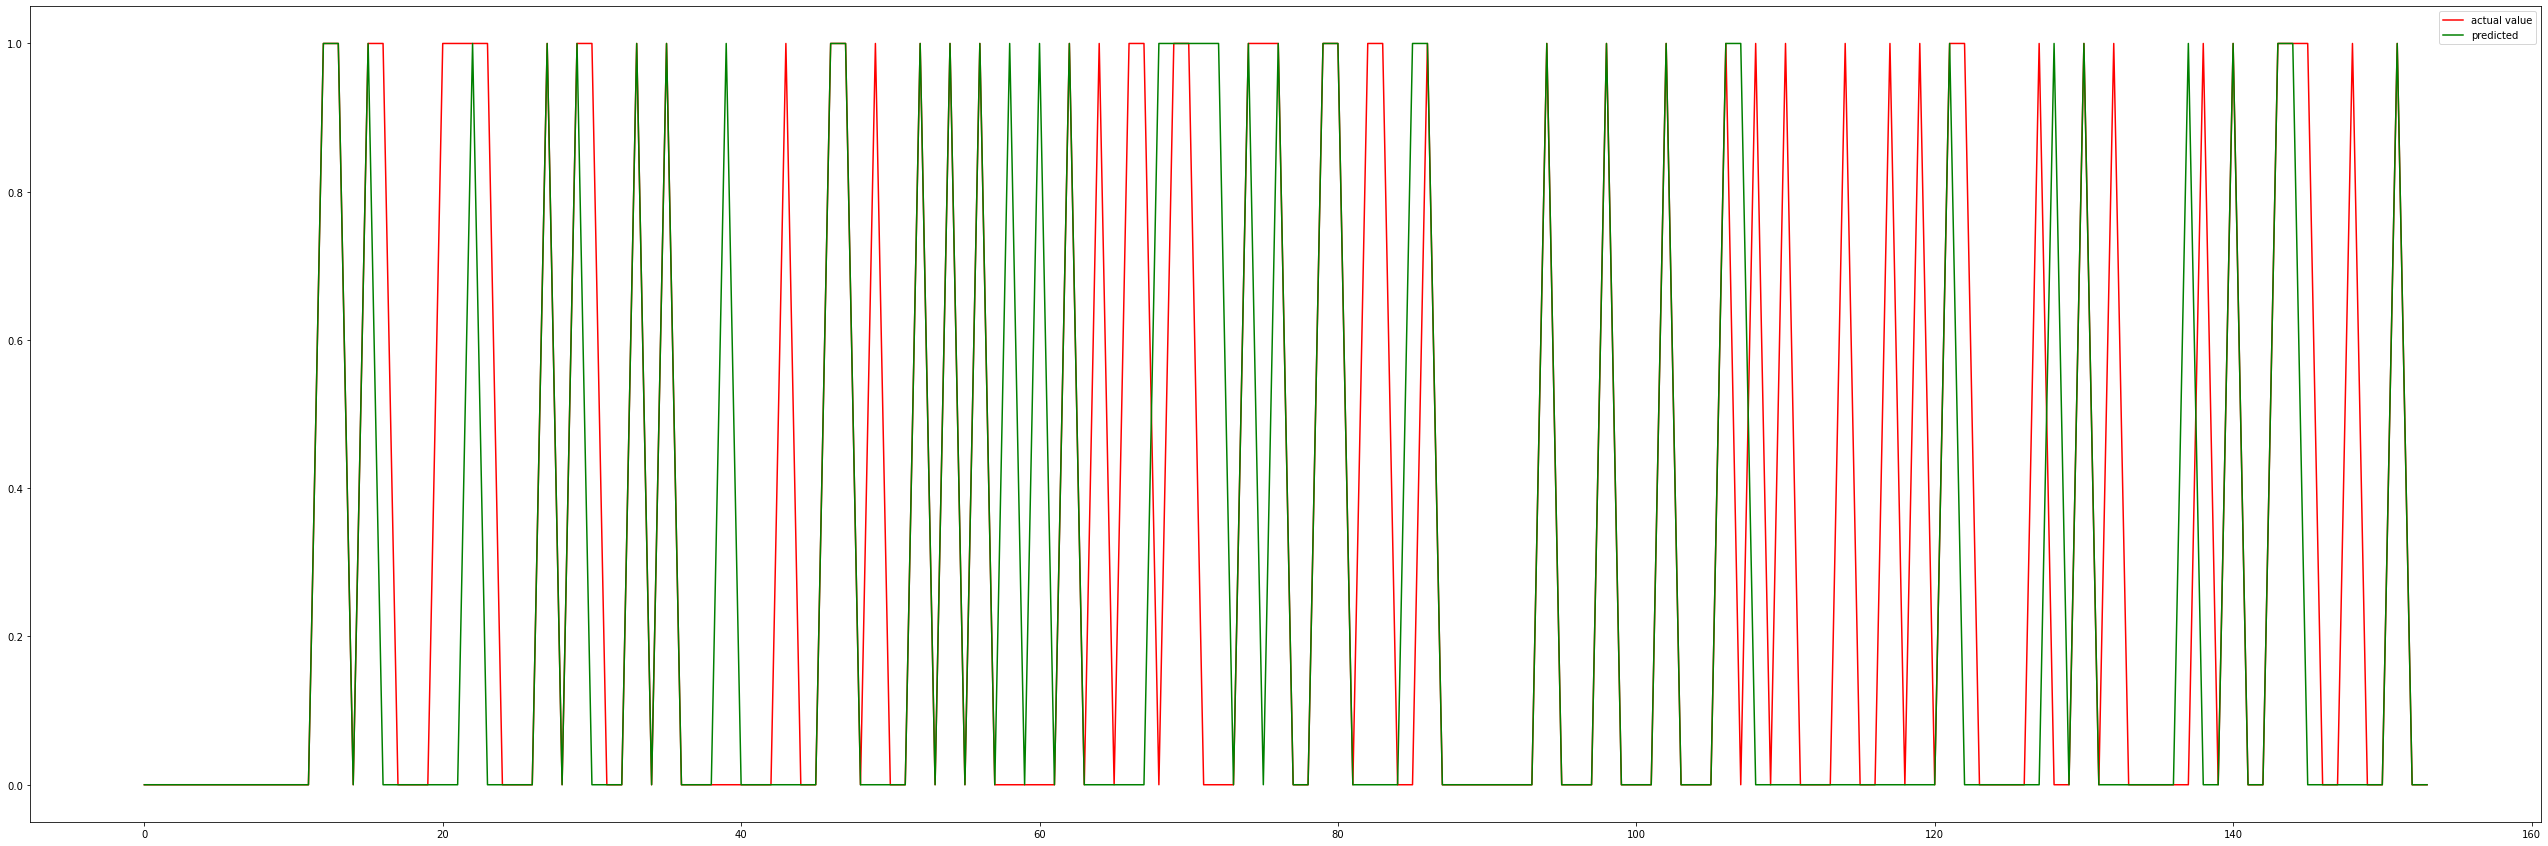

In [54]:
y_test=list(y_test)
plt.figure(figsize=(45,15))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [55]:
input=3,148,72,35,0,33.6,0.627,30
output=model4.predict([input])
print(output)


[1]


In [59]:
if output==1:
    print("the person is diabetic")
else:
    print("the person is non-diabetic")

the person is diabetic


In [60]:
import pickle
with open("diabetes.pkl","wb") as f:
    pickle.dump(model4,f)

In [71]:
import pickle
with open("diabetes1.pkl","wb") as f:
    pickle.dump(model2,f)

In [72]:
input=3,148,72,35,0,33.6,0.627,30
output=model2.predict([input])
print(output)

[0.]
